In [ ]:
    3+5/2

5.5

In [2]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2021-09-01 13:07:32--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.03s   

2021-09-01 13:07:33 (10.4 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



(633, 806, 3)


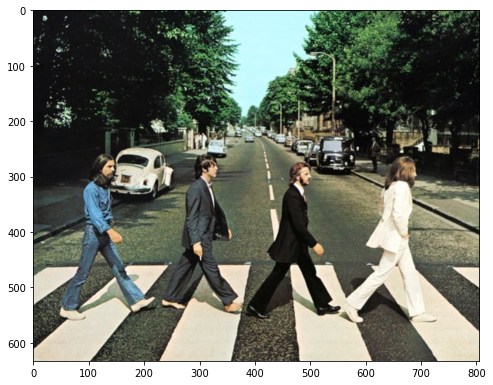

In [17]:
# module import
# image가 잘 불러와졌나 shape와 image 출력해보기
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('/content/data/beatles01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# shape 출력
print(img_rgb.shape)

# image check
plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

In [5]:
!mkdir ./pretrained
!wget -O ./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget -O ./pretrained/config_graph.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

--2021-09-01 13:09:36--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.120.128, 2607:f8b0:4001:c18::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.120.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

./pretrained/faster 100%[===================>] 363.69M   135MB/s    in 2.7s    

2021-09-01 13:09:39 (135 MB/s) - ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]

--2021-09-01 13:09:39--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.g

In [6]:
!tar -xvf ./pretrained/faster*.tar.gz -C ./pretrained 

faster_rcnn_resnet50_coco_2018_01_28/
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet50_coco_2018_01_28/checkpoint
faster_rcnn_resnet50_coco_2018_01_28/pipeline.config
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet50_coco_2018_01_28/saved_model/
faster_rcnn_resnet50_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet50_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb


In [7]:
!pwd
!ls -lia ./pretrained/faster_rcnn_resnet50_coco_2018_01_28

/content
total 296080
6299476 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 .
6299429 drwxr-xr-x 3 root   root      4096 Sep  1 13:10 ..
6299478 -rw-r--r-- 1 345018 5000        77 Feb  1  2018 checkpoint
6299485 -rw-r--r-- 1 345018 5000 120549957 Feb  1  2018 frozen_inference_graph.pb
6299480 -rw-r--r-- 1 345018 5000 176914228 Feb  1  2018 model.ckpt.data-00000-of-00001
6299477 -rw-r--r-- 1 345018 5000     14460 Feb  1  2018 model.ckpt.index
6299481 -rw-r--r-- 1 345018 5000   5675175 Feb  1  2018 model.ckpt.meta
6299479 -rw-r--r-- 1 345018 5000      3240 Feb  1  2018 pipeline.config
6299482 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 saved_model


In [18]:
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb', 
                                     './pretrained/config_graph.pbtxt')

In [9]:
# OpenCV Yolo용 
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [10]:
# OpenCV Tensorflow Faster-RCNN용
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

In [11]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}


In [19]:
img.shape

(633, 806, 3)

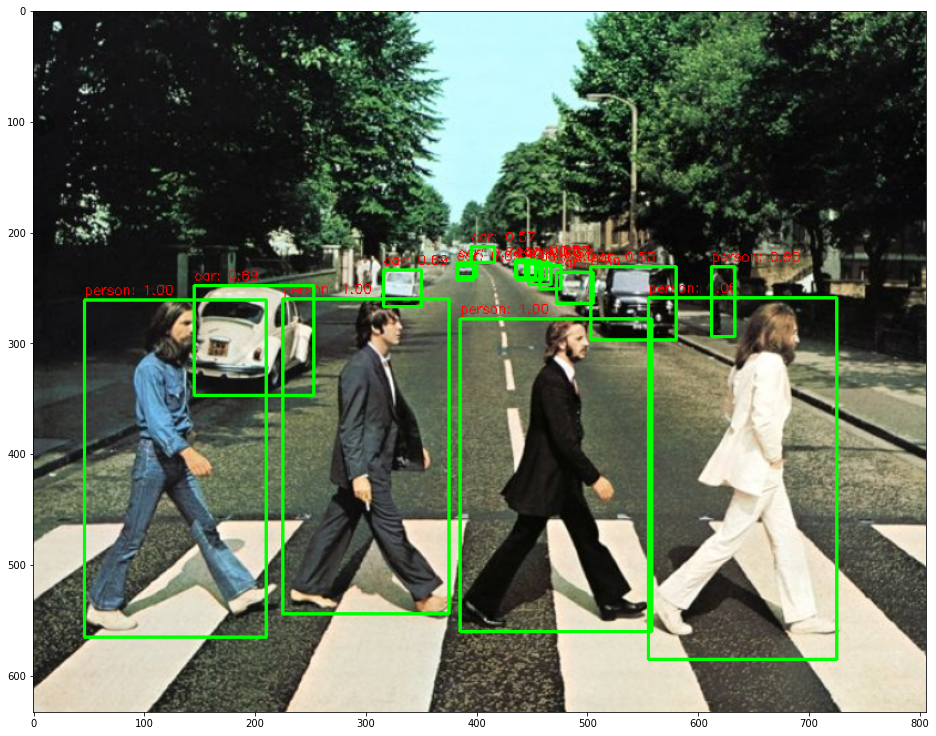

In [23]:
rows = img.shape[0]
cols = img.shape[1]

draw_img = img.copy()

cv_net.setInput(cv2.dnn.blobFromImage(draw_img, swapRB=True, crop=False))

cv_out = cv_net.forward()

green_color = (0, 255, 0)
red_color = (0, 0 ,255)

for detection in cv_out[0, 0, :, :]:
    trash = detection[0]
    class_id = detection[1]
    score = detection[2]

    if score > 0.5:

        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows

        caption = "{}: {:.2f}".format(labels_to_names_0[class_id], score)

        cv2.rectangle(draw_img, (int(left),int(top)), (int(right),int(bottom)), color=green_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,16))
plt.imshow(img_rgb)
plt.show()

In [35]:
import time
def get_detection_img(cv_net, img, score_threshold, use_copy=True, is_print=True):
    rows = img.shape[0]
    cols = img.shape[1]

    draw_img = None
    if use_copy:
        draw_img = img.copy()
    else:
        draw_img = img

    cv_net.setInput(cv2.dnn.blobFromImage(draw_img, swapRB=True, crop=False))

    start = time.time()
    cv_out = cv_net.forward()

    green_color = (0, 255, 0)
    red_color = (0, 0, 255)

    for detection in cv_out[0, 0, :, :]:
        trash = detection[0]
        class_id = detection[1]
        score = detection[2]

        if score > score_threshold:
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows

            caption = "{}:{:.3f}".format(labels_to_names_0[class_id], score)

            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption ,(int(left), int(top-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

    img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

    if is_print:
        print('Dection 수행 시간 :{}'.format(round(time.time() - start)), 2)

    return img_rgb

Dection 수행 시간 :9 2


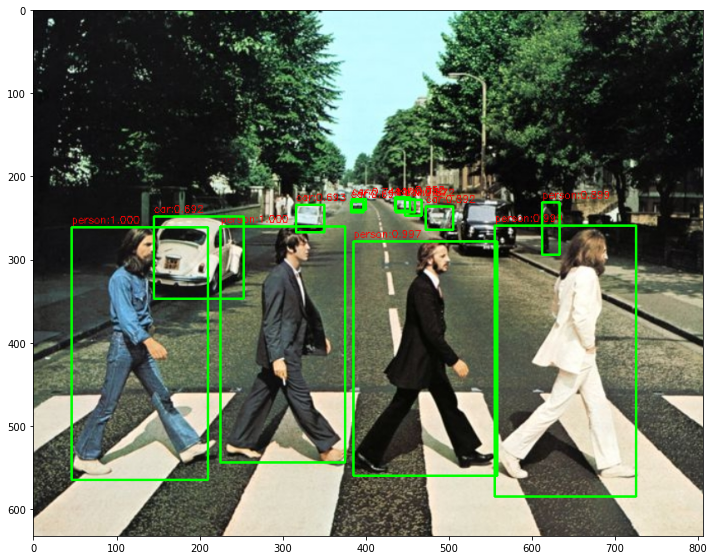

In [36]:
img = cv2.imread('/content/data/beatles01.jpg')
cv_net = cv2.dnn.readNetFromTensorflow('/content/pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb',
                                        '/content/pretrained/config_graph.pbtxt')

img_rgb = get_detection_img(cv_net, img, score_threshold=0.6, use_copy=True, is_print=True)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()

In [37]:
# 다른 image 테스트
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

--2021-09-01 13:44:56--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76279 (74K) [image/jpeg]
Saving to: ‘./data/baseball01.jpg’

./data/baseball01.j 100%[===================>]  74.49K  --.-KB/s    in 0.01s   

2021-09-01 13:44:56 (5.88 MB/s) - ‘./data/baseball01.jpg’ saved [76279/76279]



Dection 수행 시간 :8 2


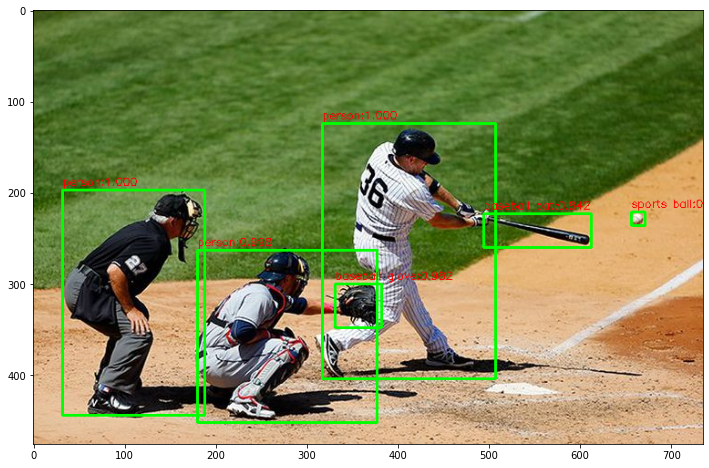

In [38]:
img = cv2.imread('/content/data/baseball01.jpg')

cv_net = cv2.dnn.readNetFromTensorflow('/content/pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb',
                                       '/content/pretrained/config_graph.pbtxt')

img_rgb = get_detection_img(cv_net, img, score_threshold=0.5, use_copy=True, is_print=True)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()

In [39]:
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2021-09-01 13:47:07--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2021-09-01 13:47:08--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2021-09-01 13:47:08--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

In [40]:
video_input_path = '/content/data/Jonh_Wick_small.mp4'

cap = cv2.VideoCapture(video_input_path)
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 프레임 개수:{}'.format(frame_cnt))

총 프레임 개수:58


In [41]:
video_input_path = '/content/data/Jonh_Wick_small.mp4'
video_output_path = '/content/data/Jonh_Wick_small_output.mp4'

cap = cv2.VideoCapture(video_input_path)
codec = cv2.VideoWriter_fourcc(* 'XVID')
vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cv2.CAP_PROP_FRAME_HEIGHT))
vid_fps = int(cap.get(cv2.CAP_PROP_FPS))

vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 프레임 개수:{}'.format(frame_cnt))

총 프레임 개수:58


In [42]:
green_color = (0, 255, 0)
red_color = (0, 0, 255)

while True:
    hasFrame, img_frame = cap.read()

    if hasFrame:
        print('더 이상 출력할 frame이 없습니다.')
        break
    
    rows = img_frame.shape[0]
    cols = img_frame.shape[1]

    cv_net.setInput(cv2.dnn.blobFromImage(img_frame, swapRB=True, crop=False))
    cv_out = cv_net.forward()

    for detection in cv_out[0, 0, :, :]:
        trash = detection[0]
        class_id = detection[1]
        score = detection[2]

        if score > 0.5:
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows

            caption = '{}:{:.4f}'.format()

            cv2.rectangle(img_frame, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(img_frame, caption, (int(left), int(top-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

    vid_writer.write(img_frame)

vid_writer.release()
cap.release()

더 이상 출력할 frame이 없습니다.


In [43]:
def do_detect_video(cv_net, intput_path, output_path, score_threshold):
    cap = cv2.VideoCapture(intput_path)
    codec = cv2.VideoWriter_fourcc(* 'XVID')

    vid_fps = int(cap.get(cv2.CAP_PROP_FPS))
    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cv2.CAP_PROP_FRAME_HEIGHT))

    vid_write = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    while True:
        hasFrame, img_frame = cap.read()

        if hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        img_frame = get_detection_img(cv_net, img_frame, score_threshold=score_threshold, use_copy=True, is_print=True)

        vid_writer.write(img_frame)

    vid_writer.release()
    cap.release()

In [46]:
do_detect_video(cv_net, '/content/data/Jonh_Wick_small.mp4', './data/John_Wick_small_02.mp4', 0.2)

총 Frame 갯수: 58
더 이상 처리할 frame이 없습니다.
